In [1]:
!pip install pandas==1.2.0
!pip install xlrd==1.2.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
df_steel = pd.read_excel('/content/drive/MyDrive/DAL/steel1045.xls')

Mounted at /content/drive


In [3]:
df_steel.head(10)

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN
5,762,6,11.835,0.03692,637.569519,0.000229,0.031187,NaN,NaN,NaN
6,762,7,13.035,0.04154,761.981445,-0.000338,0.040120,NaN,NaN,NaN
7,762,8,13.838,0.04502,885.503235,0.000969,0.042809,NaN,NaN,NaN
8,762,9,14.731,0.04886,1017.265686,0.002404,0.046578,NaN,NaN,NaN
9,762,10,15.735,0.05310,1155.112427,0.004132,0.048074,NaN,NaN,NaN


In [4]:
df_steel.shape

(215, 10)

In [5]:
df_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TESTNUM   215 non-null    int64  
 1   POINTNUM  215 non-null    int64  
 2   TIME      215 non-null    float64
 3   POSIT     215 non-null    float64
 4   FORCE     215 non-null    float64
 5   EXT       215 non-null    float64
 6   CH5       215 non-null    float64
 7   CH6       0 non-null      float64
 8   CH7       0 non-null      float64
 9   CH8       0 non-null      float64
dtypes: float64(8), int64(2)
memory usage: 16.9 KB


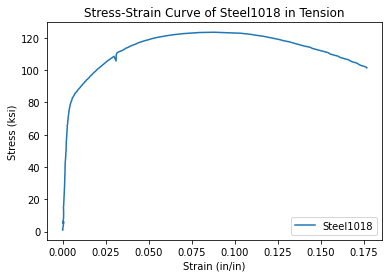

In [6]:
d = 0.506
r = d/2
A = np.pi*r**2
stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = df_steel['CH5']*0.01

fig,ax = plt.subplots()
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Steel1018 in Tension')
ax.legend(['Steel1018'])
plt.show()

In [7]:
# Calculate the tensile strength
ts_steel = np.max(stress_steel)
print(f'The tensile strength of Steel1018 is: {round(ts_steel,1)} ksi')

The tensile strength of Steel1018 is: 123.5 ksi


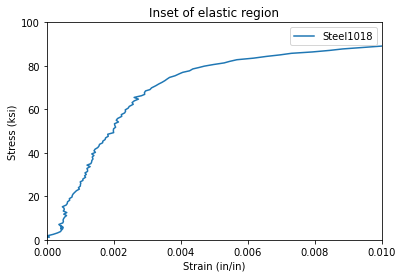

In [8]:
fig,ax = plt.subplots()
ax.plot(strain_steel, stress_steel)
ax.set_title('Inset of elastic region')
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.legend(['Steel1018'])
ax.set_xlim([0,0.01])
ax.set_ylim([0,100])
plt.show()

In [9]:
# Find the elastic modulus of Steel1018
# use stress and strain values from stress=0 to stress=55 ksi
linear_stress_steel_mask = stress_steel < 55
linear_stress_steel = stress_steel[linear_stress_steel_mask]
linear_strain_steel = strain_steel[linear_stress_steel_mask]
from scipy.stats import linregress
linear_regression_output_steel = linregress(linear_strain_steel, linear_stress_steel)
E_steel = linear_regression_output_steel[0]
print(f'The elastic modulus of Steel1018 is {round(E_steel,1)} ksi')

The elastic modulus of Steel1018 is 27869.9 ksi


In [10]:
# Find the ductility of Steel1018
stress_steel_array = np.array(stress_steel)
stress_steel_last = stress_steel_array[-1]
strain_steel_array = np.array(strain_steel)
strain_steel_last = strain_steel_array[-1]
EL_steel = -stress_steel_last/E_steel + strain_steel_last
print(f'The ductility of Steel1018 is {round(EL_steel*100,1)}%')

The ductility of Steel1018 is 17.3%
